# Question 1 - c:

The CIFAR-10 dataset is a famous computer vision dataset. It consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Download the dataset using this link: https://www.cs.toronto.edu/~kriz/cifar.html

    c) Train a convolution neural network in Keras with L number of layers. Each “layer” is a convolution+ReLU+Pooling.
    Set L to be 2,3, and 4. The Pooling can be Max Pooling or Average Pooling. Plot the training and testing loss and
    accuracy as a function of number of training epochs. Report the results of all 6 settings: L=2 with Max pooling,
    L=2 with Avg pooling, L=3 with Max pooling, L=3 with Avg pooling, L=4 with Max pooling, L=4 with Avg pooling. 
    What setting is the best setting? Why?

In [2]:
#To ignore tensorflow's numpy related warnings
import warnings
warnings.simplefilter("ignore")

## Libraries

The numpy library provides basic array convertion and type conversion for convenience. We used the CIFAR-10 dataset provided with tensorflow's keras. Since our goal is to plot images, we utilized the matplotlib for the plotting task. We implemented the random library to obtain random values for data entry selection. To implement principal component analysis (PCA) in our work, we utilized the PCA method provided by sklearn library. Detailed information can be found on the sklearn website: https://scikit-learn.org/stable/modules/decomposition.html#pca.

In [3]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import ModelCheckpoint
import math

Using TensorFlow backend.
C:\Users\slm\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\slm\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, cop

In [4]:
def plot_results(history):
    plt.figure(figsize=(12, 12))
    # Plot training accuracy
    plt.subplot(311)
    plt.plot(history.history['accuracy'])
    plt.title('training accuracy')
    plt.ylabel('training accuracy')
    plt.xlabel('epoch')
    plt.show()
    # Plot validation accuracy
    plt.figure(figsize=(12, 12))
    plt.subplot(312)
    plt.plot(history.history['val_accuracy'])
    plt.title('validation accuracy')
    plt.ylabel('validation accuracy')
    plt.xlabel('epoch')
    plt.show()
    # plot loss
    plt.figure(figsize=(12, 12))
    plt.subplot(313)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #pyplot.savefig(filename + '_plot.png')
    #pyplot.close()

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0



Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 99s 2ms/step - loss: 2.0509 - accuracy: 0.4055 - val_loss: 1.9760 - val_accuracy: 0.4807
Epoch 2/20
50000/50000 [==============================] - 100s 2ms/step - loss: 1.9430 - accuracy: 0.5146 - val_loss: 1.9164 - val_accuracy: 0.5415
Epoch 3/20
50000/50000 [==============================] - 99s 2ms/step - loss: 1.8898 - accuracy: 0.5694 - val_loss: 1.8927 - val_accuracy: 0.5656
Epoch 4/20
50000/50000 [==============================] - 102s 2ms/step - loss: 1.8553 - accuracy: 0.6044 - val_loss: 1.8601 - val_accuracy: 0.5995
Epoch 5/20
50000/50000 [==============================] - 104s 2ms/step - loss: 1.8311 - accuracy: 0.6294 - val_loss: 1.8312 - val_accuracy: 0.6272
Epoch 6/20
50000/50000 [==============================] - 106s 2ms/step - loss: 1.8109 - accuracy: 0.6489 - val_loss: 1.8307 - val_accuracy: 0.6286
Epoch 7/20
50000/50000 [==============================] - 114s

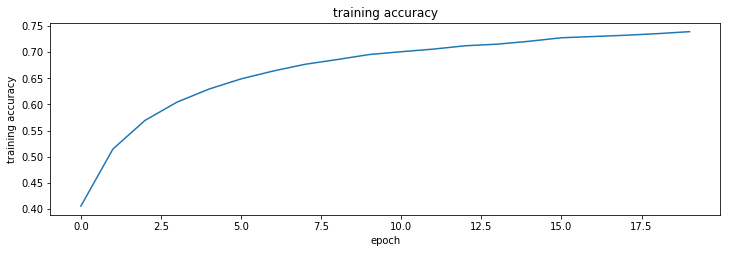

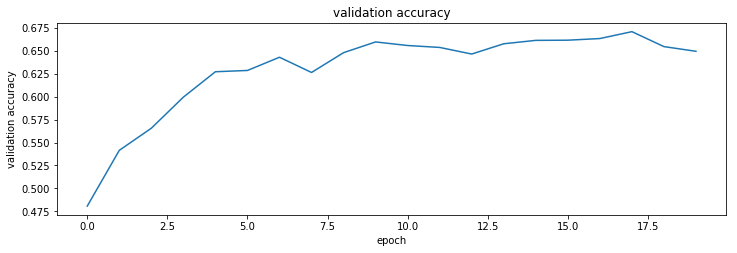

10000/10000 [==============================] - 7s 744us/step
Test accuracy: [1.8107440879821777, 0.6495000123977661]


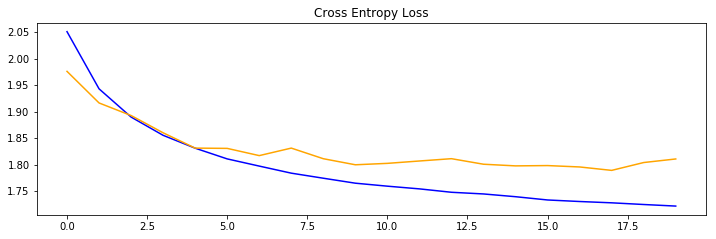

In [6]:
# First CNN model with L=2 and Max Pooling
model1 = keras.models.Sequential()
#1st Convolutional Layer with Max Pooling
model1.add(Conv2D(128, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
#2nd Convolutional Layer with Max Pooling
model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
#Dense Layer
model1.add(Flatten())
model1.add(Dense(10))
model1.add(Activation('softmax'))

model1.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))

plot_results(history1)
# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
acc1, val1, scores1, loss1, valloss1 = history1.history['accuracy'], history1.history['val_accuracy'], model1.evaluate(X_test, y_test, verbose=1), history1.history['loss'], history1.history['val_loss']
print('Test accuracy:', scores1)


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 112s 2ms/step - loss: 2.0970 - accuracy: 0.3577 - val_loss: 2.0536 - val_accuracy: 0.3977
Epoch 2/20
50000/50000 [==============================] - 107s 2ms/step - loss: 1.9986 - accuracy: 0.4597 - val_loss: 1.9560 - val_accuracy: 0.5028
Epoch 3/20
50000/50000 [==============================] - 103s 2ms/step - loss: 1.9455 - accuracy: 0.5122 - val_loss: 1.9298 - val_accuracy: 0.5276
Epoch 4/20
50000/50000 [==============================] - 104s 2ms/step - loss: 1.9132 - accuracy: 0.5464 - val_loss: 1.9046 - val_accuracy: 0.5539
Epoch 5/20
50000/50000 [==============================] - 105s 2ms/step - loss: 1.8922 - accuracy: 0.5671 - val_loss: 1.8964 - val_accuracy: 0.5615
Epoch 6/20
50000/50000 [==============================] - 105s 2ms/step - loss: 1.8728 - accuracy: 0.5863 - val_loss: 1.8911 - val_accuracy: 0.5665
Epoch 7/20
50000/50000 [==============================] - 106

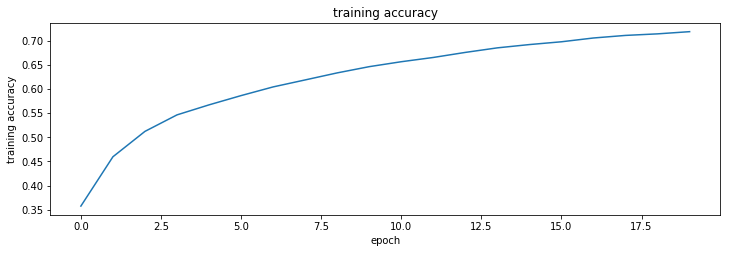

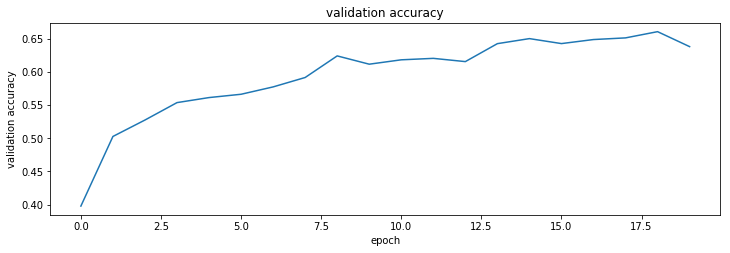

10000/10000 [==============================] - 7s 708us/step
Test accuracy: [1.8194139427185059, 0.6384000182151794]


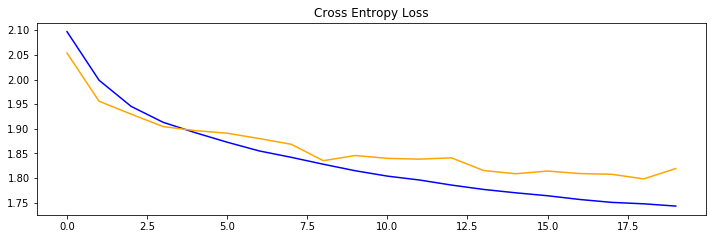

In [7]:
# Second CNN model with L=2 and Average Pooling
model2 = keras.models.Sequential()
#1st Convolutional Layer with Average Pooling
model2.add(Conv2D(128, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(AveragePooling2D(pool_size=(2, 2)))
#2nd Convolutional Layer with Average Pooling
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(AveragePooling2D(pool_size=(2, 2)))
#Dense Layer
model2.add(Flatten())
model2.add(Dense(10))
model2.add(Activation('softmax'))

model2.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))

plot_results(history2)
# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
acc2, val2, scores2, loss2, valloss2 = history2.history['accuracy'], history2.history['val_accuracy'], model2.evaluate(X_test, y_test, verbose=1), history2.history['loss'], history2.history['val_loss']
print('Test accuracy:', scores2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 109s 2ms/step - loss: 2.1153 - accuracy: 0.3373 - val_loss: 2.0336 - val_accuracy: 0.4188
Epoch 2/20
50000/50000 [==============================] - 108s 2ms/step - loss: 2.0105 - accuracy: 0.4461 - val_loss: 2.0032 - val_accuracy: 0.4530
Epoch 3/20
50000/50000 [==============================] - 107s 2ms/step - loss: 1.9591 - accuracy: 0.4981 - val_loss: 1.9388 - val_accuracy: 0.5181
Epoch 4/20
50000/50000 [==============================] - 107s 2ms/step - loss: 1.9194 - accuracy: 0.5387 - val_loss: 1.9080 - val_accuracy: 0.5499
Epoch 5/20
50000/50000 [==============================] - 108s 2ms/step - loss: 1.8846 - accuracy: 0.5740 - val_loss: 1.8683 - val_accuracy: 0.5907
Epoch 6/20
50000/50000 [==============================] - 110s 2ms/step - loss: 1.8638 - accuracy: 0.5947 - val_loss: 1.8817 - val_accuracy: 0.5755
Epoch 7/20
50000/50000 [==============================] - 111s

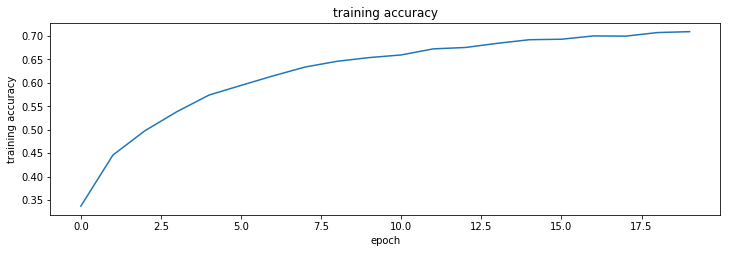

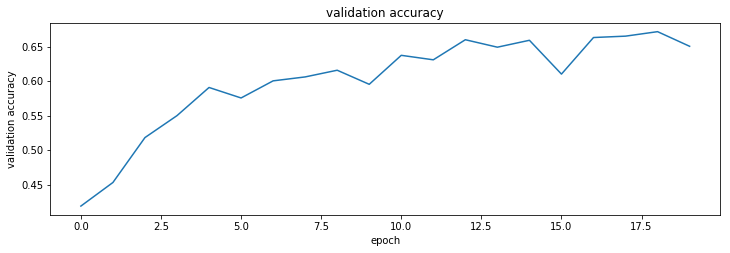

10000/10000 [==============================] - 8s 786us/step
Test accuracy: [1.8086479852676391, 0.6503999829292297]


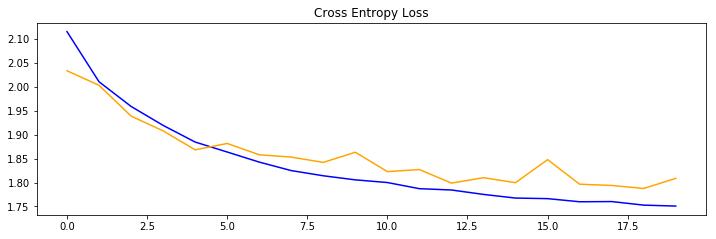

In [8]:
# Third CNN model with L=3 and Max Pooling
model3 = keras.models.Sequential()
#1st Convolutional Layer with Max Pooling
model3.add(Conv2D(128, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
#2nd Convolutional Layer with Max Pooling
model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
#3rd Convolutional Layer with Max Pooling
model3.add(Conv2D(32, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
#Dense Layer
model3.add(Flatten())
model3.add(Dense(10))
model3.add(Activation('softmax'))

model3.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))

plot_results(history3)
# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
acc3, val3, scores3, loss3, valloss3 = history3.history['accuracy'], history3.history['val_accuracy'], model3.evaluate(X_test, y_test, verbose=1), history3.history['loss'], history3.history['val_loss']
print('Test accuracy:', scores3)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 102s 2ms/step - loss: 2.1093 - accuracy: 0.3436 - val_loss: 2.0431 - val_accuracy: 0.4118
Epoch 2/20
50000/50000 [==============================] - 104s 2ms/step - loss: 2.0332 - accuracy: 0.4217 - val_loss: 1.9957 - val_accuracy: 0.4605
Epoch 3/20
50000/50000 [==============================] - 102s 2ms/step - loss: 1.9963 - accuracy: 0.4610 - val_loss: 1.9872 - val_accuracy: 0.4676
Epoch 4/20
50000/50000 [==============================] - 101s 2ms/step - loss: 1.9685 - accuracy: 0.4890 - val_loss: 1.9483 - val_accuracy: 0.5101
Epoch 5/20
50000/50000 [==============================] - 99s 2ms/step - loss: 1.9381 - accuracy: 0.5210 - val_loss: 1.9241 - val_accuracy: 0.5350
Epoch 6/20
50000/50000 [==============================] - 102s 2ms/step - loss: 1.9178 - accuracy: 0.5395 - val_loss: 1.9174 - val_accuracy: 0.5413
Epoch 7/20
50000/50000 [==============================] - 103s 

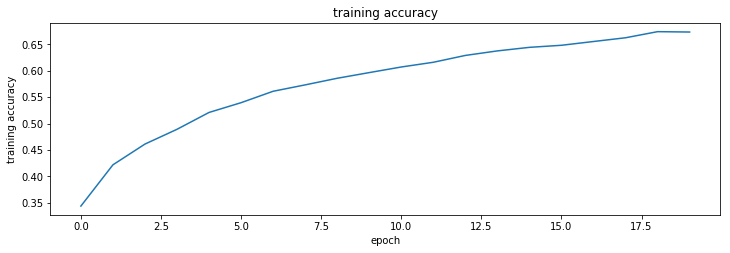

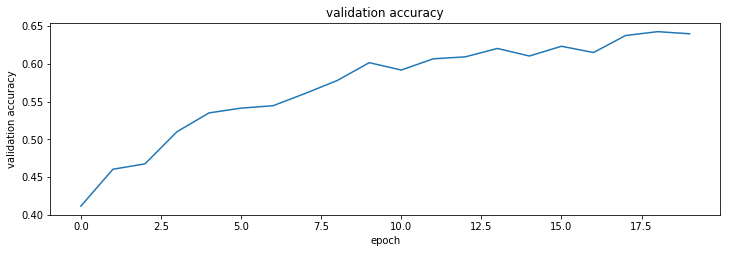

10000/10000 [==============================] - 8s 757us/step
Test accuracy: [1.8202372509002684, 0.6395999789237976]


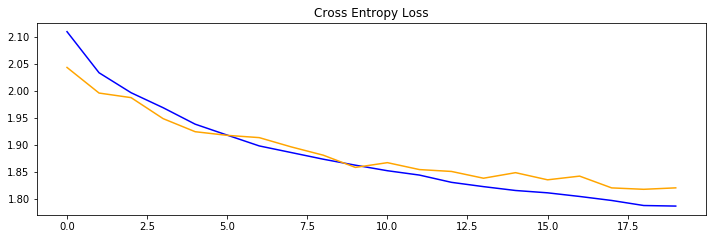

In [9]:
# Fourth CNN model with L=3 and Average Pooling
model4 = keras.models.Sequential()
#1st Convolutional Layer with Max Pooling
model4.add(Conv2D(128, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(AveragePooling2D(pool_size=(2, 2)))
#2nd Convolutional Layer with Max Pooling
model4.add(Conv2D(64, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(AveragePooling2D(pool_size=(2, 2)))
#3rd Convolutional Layer with Max Pooling
model4.add(Conv2D(32, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(AveragePooling2D(pool_size=(2, 2)))
#Dense Layer
model4.add(Flatten())
model4.add(Dense(10))
model4.add(Activation('softmax'))

model4.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history4 = model4.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))

plot_results(history4)
# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
acc4, val4, scores4, loss4, valloss4 = history4.history['accuracy'], history4.history['val_accuracy'], model4.evaluate(X_test, y_test, verbose=1), history4.history['loss'], history4.history['val_loss']
print('Test accuracy:', scores4)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 95s 2ms/step - loss: 2.1147 - accuracy: 0.3384 - val_loss: 2.0470 - val_accuracy: 0.4065
Epoch 2/20
50000/50000 [==============================] - 94s 2ms/step - loss: 2.0029 - accuracy: 0.4541 - val_loss: 1.9762 - val_accuracy: 0.4802
Epoch 3/20
50000/50000 [==============================] - 94s 2ms/step - loss: 1.9605 - accuracy: 0.4976 - val_loss: 1.9447 - val_accuracy: 0.5150
Epoch 4/20
50000/50000 [==============================] - 93s 2ms/step - loss: 1.9361 - accuracy: 0.5216 - val_loss: 1.9453 - val_accuracy: 0.5130
Epoch 5/20
50000/50000 [==============================] - 95s 2ms/step - loss: 1.9160 - accuracy: 0.5418 - val_loss: 1.9373 - val_accuracy: 0.5211
Epoch 6/20
50000/50000 [==============================] - 98s 2ms/step - loss: 1.9036 - accuracy: 0.5541 - val_loss: 1.9172 - val_accuracy: 0.5406
Epoch 7/20
50000/50000 [==============================] - 99s 2ms/st

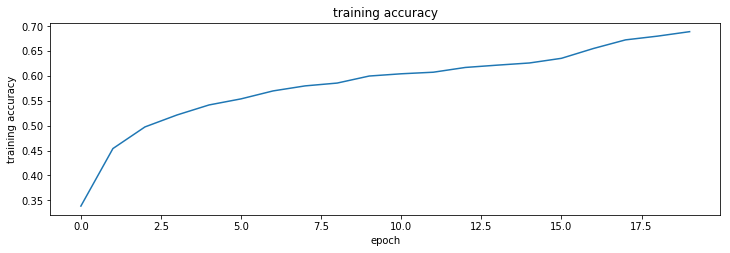

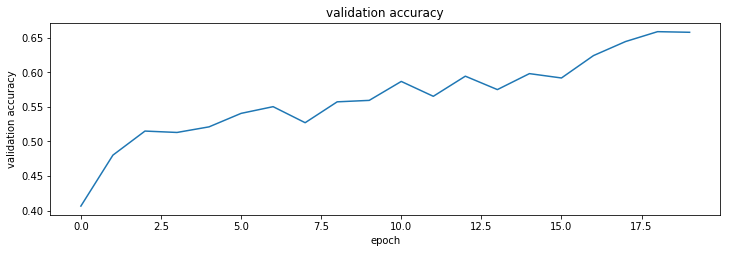

10000/10000 [==============================] - 8s 813us/step
Test accuracy: [1.802173812866211, 0.6578999757766724]


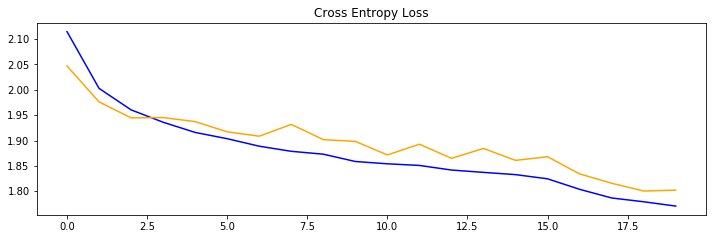

In [10]:
# Fifth CNN model with L=4 and Max Pooling
model5 = keras.models.Sequential()
#1st Convolutional Layer with Max Pooling
model5.add(Conv2D(128, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
#2nd Convolutional Layer with Max Pooling
model5.add(Conv2D(64, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
#3rd Convolutional Layer with Max Pooling
model5.add(Conv2D(32, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
#Dense Layer
model5.add(Flatten())
model5.add(Dense(10))
model5.add(Activation('softmax'))

model5.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history5 = model5.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))

plot_results(history5)
# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
acc5, val5, scores5, loss5, valloss5 = history5.history['accuracy'], history5.history['val_accuracy'], model5.evaluate(X_test, y_test, verbose=1), history5.history['loss'], history5.history['val_loss']
print('Test accuracy:', scores5)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 117s 2ms/step - loss: 2.0916 - accuracy: 0.3617 - val_loss: 2.0245 - val_accuracy: 0.4310
Epoch 2/20
50000/50000 [==============================] - 118s 2ms/step - loss: 1.9872 - accuracy: 0.4690 - val_loss: 1.9596 - val_accuracy: 0.4986
Epoch 3/20
50000/50000 [==============================] - 124s 2ms/step - loss: 1.9306 - accuracy: 0.5273 - val_loss: 1.9066 - val_accuracy: 0.5507
Epoch 4/20
50000/50000 [==============================] - 117s 2ms/step - loss: 1.8917 - accuracy: 0.5665 - val_loss: 1.8794 - val_accuracy: 0.5810
Epoch 5/20
50000/50000 [==============================] - 116s 2ms/step - loss: 1.8663 - accuracy: 0.5920 - val_loss: 1.8653 - val_accuracy: 0.5942
Epoch 6/20
50000/50000 [==============================] - 115s 2ms/step - loss: 1.8446 - accuracy: 0.6149 - val_loss: 1.8607 - val_accuracy: 0.5952
Epoch 7/20
50000/50000 [==============================] - 119s

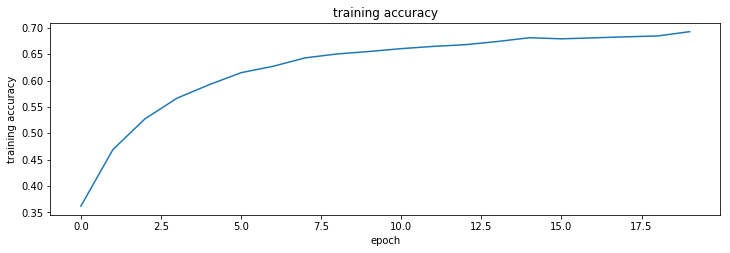

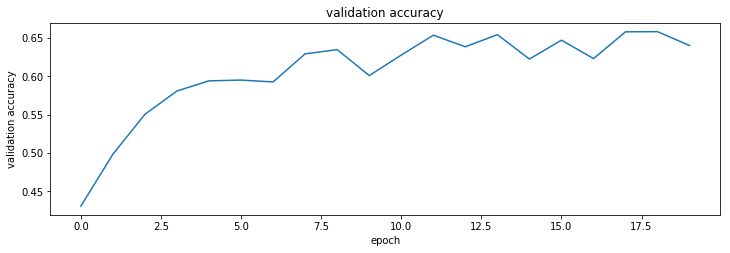

10000/10000 [==============================] - 8s 816us/step
Test accuracy: [1.8192521408081055, 0.6402000188827515]


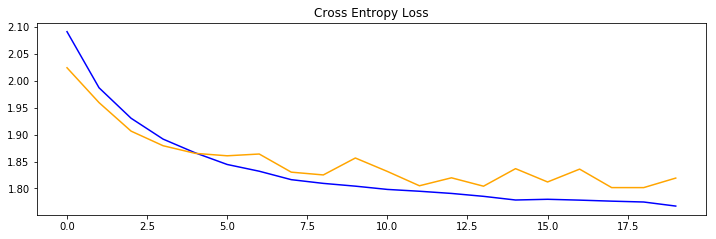

In [11]:
# Sixth CNN model with L=4 and Max Pooling
model6 = keras.models.Sequential()
#1st Convolutional Layer with Max Pooling
model6.add(Conv2D(128, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
#2nd Convolutional Layer with Max Pooling
model6.add(Conv2D(64, (3, 3), padding='same'))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
#3rd Convolutional Layer with Max Pooling
model6.add(Conv2D(32, (3, 3), padding='same'))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
#Dense Layer
model6.add(Flatten())
model6.add(Dense(10))
model6.add(Activation('softmax'))

model6.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history6 = model6.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))

plot_results(history6)
# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
acc6, val6, scores6, loss6, valloss6 = history6.history['accuracy'], history6.history['val_accuracy'], model6.evaluate(X_test, y_test, verbose=1), history6.history['loss'], history6.history['val_loss']
print('Test accuracy:', scores6)

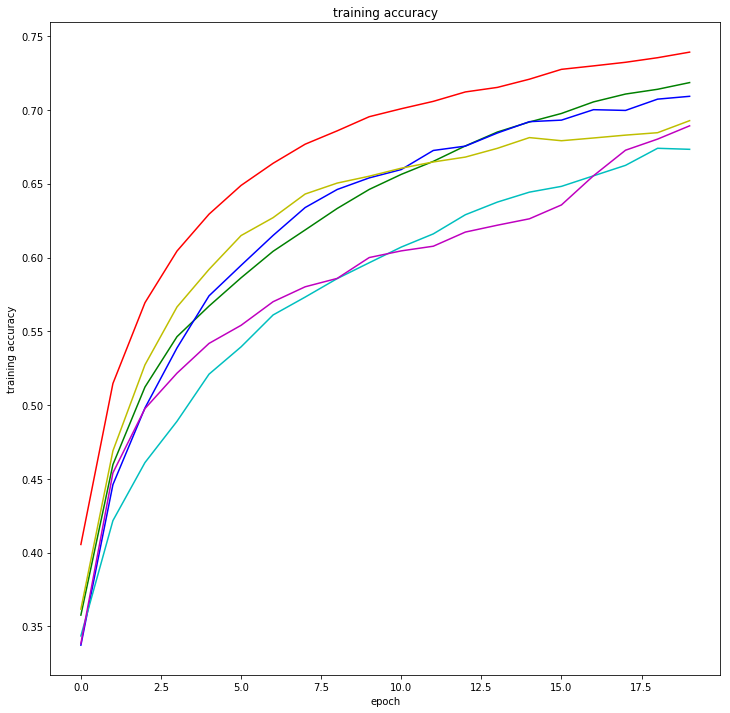

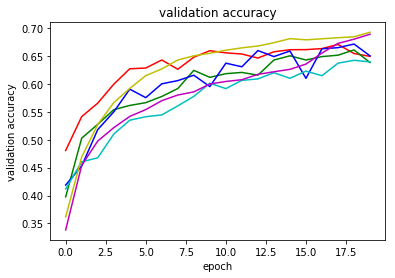

In [12]:
accs = [acc1, acc2, acc3, acc4, acc5, acc6]
vals = [val1, val2, val3, val4, acc5, acc6]
losses = [loss1, loss2, loss3, loss4, loss5, loss6]
vallosses = [valloss1, valloss2, valloss3, valloss4, valloss5, valloss6]
cols = ["r", "g", "b", "c", "m", "y"]
plt.figure(figsize=(12, 12))
# Plot training accuracy
for a,i in zip(accs, range(6)): plt.plot(a, c=cols[i])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.show()
# Plot validation accuracy
for v,j in zip(vals, range(6)): plt.plot(v, c=cols[j])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.show()
#Red is L=2 and MaxPooling, green is L=2 and AvgPooling, blue is L=3 and MaxPooling, cyan is L=3 and AvgPooling, magenta is L=4 and MaxPooling and yellow is L=4 and AvgPooling